In [ ]:
import pandas as pd
import requests
import json
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 4106902 = Curitiba city geocode
url = 'https://info.dengue.mat.br/api/alertcity'
search_filter = (
    'geocode=4106902&disease=dengue&format=csv&' +
    'ew_start=1&ew_end=50&ey_start=2010&ey_end=2024'
)
df = pd.read_csv('%s?%s' % (url, search_filter))
print(url)
print()

df.index = pd.to_datetime(df['data_iniSE'])
display(df.head())

print()
print(df.shape)
print(df.index.min(), df.index.max())


https://info.dengue.mat.br/api/alertcity



,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,...,umidmed,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year
data_iniSE,,,,,,,,,,,,,,,,,,,,,
2024-05-05,2024-05-05,202419,1947.5,854,4297,148,9.997162e-01,104.044846,0,4,...,77.289867,76.273889,20.857143,21.000000,NaN,NaN,NaN,NaN,NaN,45435
2024-04-28,2024-04-28,202418,1662.5,1107,2608,619,1.205287e-05,88.818770,0,4,...,85.601454,84.054574,21.214286,21.571429,NaN,NaN,NaN,NaN,NaN,45435
2024-04-21,2024-04-21,202417,1605.0,1339,2079,1004,0.000000e+00,85.746840,0,4,...,90.956255,89.209925,18.250000,18.500000,NaN,NaN,NaN,NaN,NaN,45435
2024-04-14,2024-04-14,202416,1903.0,1713,2202,1479,6.804446e-12,101.667440,0,4,...,94.334928,93.030962,17.714286,17.857143,NaN,NaN,NaN,NaN,NaN,45435
2024-04-07,2024-04-07,202415,2200.0,2047,2451,1870,9.560121e-03,117.534615,0,4,...,93.977726,93.125139,18.642857,18.714286,NaN,NaN,NaN,NaN,NaN,45435



(749, 30)
2010-01-03 00:00:00 2024-05-05 00:00:00


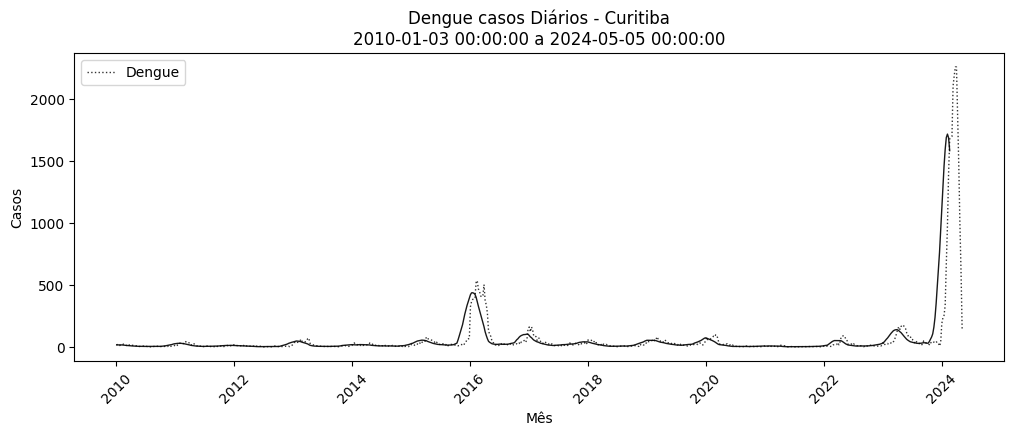

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.plot(df.casos, label='Dengue', color='k', alpha=.8, linestyle=':', lw=1)
ax1.plot(df.casos.rolling(12).mean(), color='k', alpha=.9, lw=1)

plt.xlabel('Mês')
plt.ylabel('Casos')
plt.title('Dengue casos Diários - Curitiba\n' + str(df.index.min()) + ' a ' + str(df.index.max()))
plt.xticks(rotation=45)
ax1.legend()

plt.show()


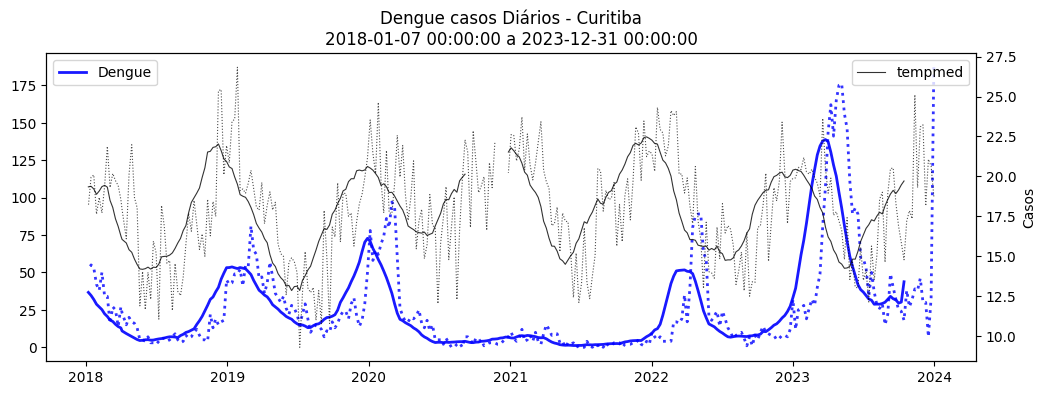

In [ ]:
df = df[ (df.index.year >= 2018) & (df.index.year <= 2023) ]

fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.plot(df.casos, color='b', alpha=.8, linestyle=':', lw=2)
ax1.plot(df.casos.rolling(12).mean(), label='Dengue', color='b', alpha=.9, lw=2)

ax2 = ax1.twinx()

for tipo, color in zip(['tempmed'],['k']):
  ax2.plot(df[tipo], color=color, alpha=.7, linestyle=':', lw=0.8)
  ax2.plot(df[tipo].rolling(12).mean(), label=tipo, color=color, alpha=.8, lw=0.8)

plt.xlabel('Mês')
plt.ylabel('Casos')
plt.title('Dengue casos Diários - Curitiba\n' + str(df.index.min()) + ' a ' + str(df.index.max()))
plt.xticks(rotation=45)

ax1.legend()
ax2.legend()

plt.show()